<a href="https://colab.research.google.com/github/hypro2/LLM-Multimodal-Colab/blob/main/Meta_Llama_3_8B_Instruct_bnb_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U transformers accelerate bitsandbytes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 3.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manyli

In [2]:
import transformers
import torch

model_id = "NousResearch/Meta-Llama-3-8B-Instruct"

In [5]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(
    model_id
)
# model = AutoModelForCausalLM.from_pretrained(
#    model_id,
#     device_map="auto",
#     torch_dtype="auto",
# )
model = AutoModelForCausalLM.from_pretrained(model_id,
                                             return_dict=True,
                                             torch_dtype='auto',
                                             device_map='auto',
                                             do_sample=True,
                                             load_in_4bit=True,
                                            )


tokenizer_config.json:   0%|          | 0.00/51.1k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/73.0 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/654 [00:00<?, ?B/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/126 [00:00<?, ?B/s]

In [7]:
text = """
유희왕 카드 퀴즈
```
하루 우라라
이 카드명의 효과는 1턴에 1번밖에 사용할 수 없다.
①: 이하의 어느 효과를 포함하는 마법 / 함정 / 몬스터의 효과가 발동했을 때, 이 카드를 패에서 버리고 발동할 수 있다. 그 효과를 무효로 한다.
●덱에서 카드를 패에 넣는 효과
●덱에서 몬스터를 특수 소환하는 효과
●덱에서 카드를 묘지로 보내는 효과
```
```
개기일식의 서
속공 마법
①: 필드의 앞면 표시 몬스터를 전부 뒷면 수비 표시로 한다. 이 턴의 엔드 페이즈에, 상대 필드의 뒷면 수비 표시 몬스터를 전부 앞면 수비 표시로 하고, 그 후, 이 효과로 앞면 수비 표시로 한 몬스터의 수만큼 상대는 덱에서 드로우한다.
```

Q1. 상대가 개기일식의 서를 발동했습니다. 개기일식의 서의 효과에 체인하여 하루 우라라를 발동하여 상대의 효과를 무효화 수 있을까요?
"""


chat = [
    { "role": "system", "content": " You are an artificial intelligence assistant that answers in Korean." },
    { "role": "user", "content": f"{text}" },
]
prompt = tokenizer.apply_chat_template(chat, tokenize=False, add_generation_prompt=True)


token_ids = tokenizer.encode(prompt, add_special_tokens=False, return_tensors="pt")

with torch.no_grad():
    output_ids = model.generate(
        token_ids.to(model.device),
        do_sample=True,
        temperature=0.6,
        top_p=0.9,
        max_new_tokens=256,
        eos_token_id=[
            tokenizer.eos_token_id,
            tokenizer.convert_tokens_to_ids("<|eot_id|>")
        ],
    )
output = tokenizer.decode(output_ids.tolist()[0][token_ids.size(1) :], skip_special_tokens=True)

print(output)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


😊

하루 우라라의 ① 효과는, 이하의 어느 효과를 포함하는 마법/함정/몬스터의 효과가 발동했을 때, 이 카드를 패에서 버리고 발동할 수 있습니다. 개기일식의 서의 ① 효과는 필드의 앞면 표시 몬스터를 전부 뒷면 수비 표시로 하는 효과입니다.

따라서, 하루 우라라의 ① 효과는 개기일식의 서의 ① 효과를 포함하는 효과입니다. 따라서, 하루 우라라를 발동하여 상대의 효과를 무효화할 수 있습니다! 🎉


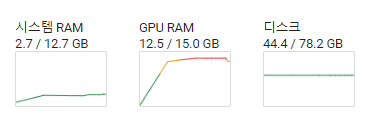

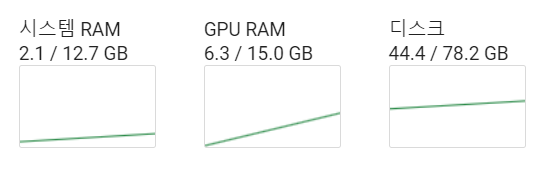